## Data Scaling Exercises

Do your work for these exercises in a jupyter notebook named ```scaling```. Use the telco dataset. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

1.  Apply the scalers we talked about in this lesson to your data and visualize the results in a way that can .


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
import pandas as pd
import wrangle
from wrangle import wrangle_telco
import env


In [2]:
train, validate, test = wrangle_telco()

In [3]:
train.head()

,customer_id,tenure,monthly_charges,total_charges
1256,7501-IWUNG,61,73.80,4616.05
225,1303-SRDOK,55,69.05,3842.60
662,3967-VQOGC,67,24.90,1680.25
628,3777-XROBG,58,19.55,1079.65
824,5075-JSDKI,59,24.45,1493.10


In [4]:
train = train.drop(columns = ['customer_id'])
validate = validate.drop(columns = ['customer_id'])
test = test.drop(columns = ['customer_id'])

In [5]:
train.shape, validate.shape, test.shape

((949, 3), (407, 3), (339, 3))

In [6]:
#Make the thing
scaler = sklearn.preprocessing.MinMaxScaler()

#Fit the thing
scaler.fit(train[['monthly_charges']])

#Transform the thing
scaled = scaler.transform(train[['monthly_charges']])

##fit and transform in one step
#scaled = scaler.fit_transform(train[['monthly_charges']])
#scaled


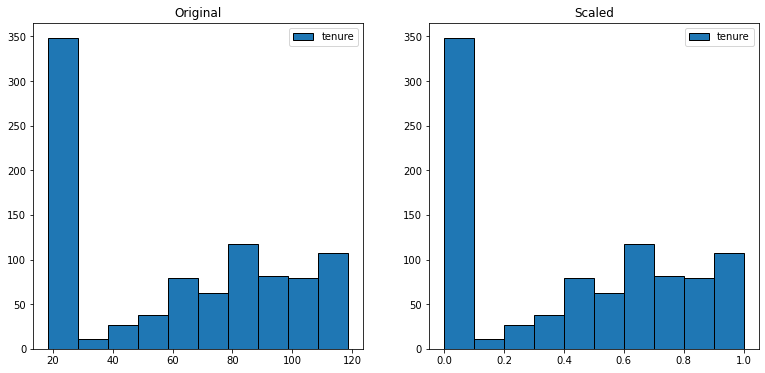

In [7]:
plt.figure(figsize=(13,6))
plt.subplot(121)
plt.hist(train.monthly_charges, bins=10, ec='black')
plt.title('Original')
plt.legend(train)
plt.subplot(122)
plt.hist(scaled,bins=10,ec='black')
plt.title('Scaled')
plt.legend(train)

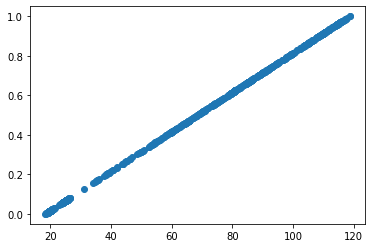

In [8]:
plt.scatter(train.monthly_charges, scaled)

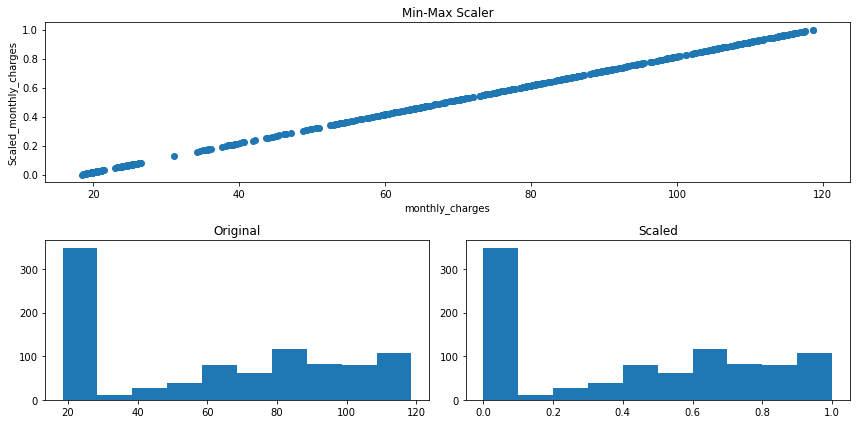

In [9]:
#Alternatively, plot all in one

fig = plt.figure(figsize = (12,6))

gs = plt.GridSpec(2,2)

ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

ax1.scatter(train.monthly_charges, scaled)
ax1.set(xlabel = 'monthly_charges', ylabel = 'Scaled_monthly_charges', title = 'Min-Max Scaler')

ax2.hist(train.monthly_charges)
ax2.set(title = 'Original')

ax3.hist(scaled)
ax3.set(title = 'Scaled')
plt.tight_layout();

In [10]:
#Defining a function to allow us to apply different scalers
def visualize_scaled_date(scaler, scaler_name, feature):
    scaled = scaler.fit_transform(train[[feature]])
    fig = plt.figure(figsize = (12,6))

    gs = plt.GridSpec(2,2)

    ax1 = fig.add_subplot(gs[0, :])
    ax2 = fig.add_subplot(gs[1,0])
    ax3 = fig.add_subplot(gs[1,1])

    ax1.scatter(train[[feature]], scaled)
    ax1.set(xlabel = feature, ylabel = 'Scaled_' + feature, title = scaler_name)

    ax2.hist(train[[feature]])
    ax2.set(title = 'Original')

    ax3.hist(scaled)
    ax3.set(title = 'Scaled')
    plt.tight_layout();



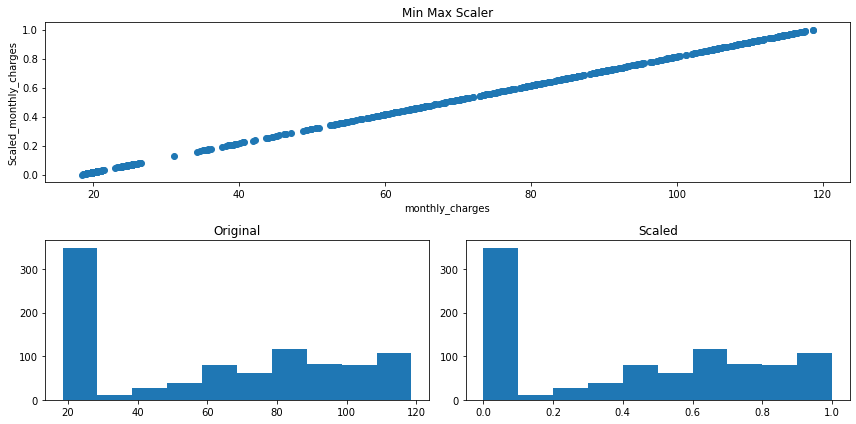

In [11]:
visualize_scaled_date(sklearn.preprocessing.MinMaxScaler(), 'Min Max Scaler', 'monthly_charges')

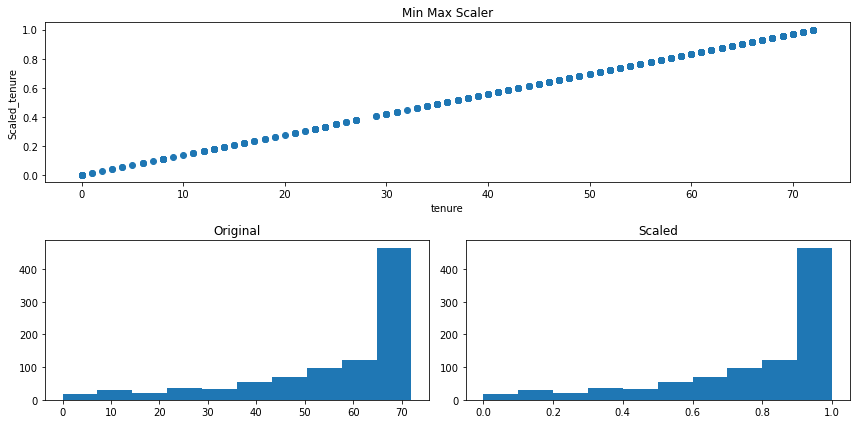

In [12]:
visualize_scaled_date(sklearn.preprocessing.MinMaxScaler(), 'Min Max Scaler', 'tenure')

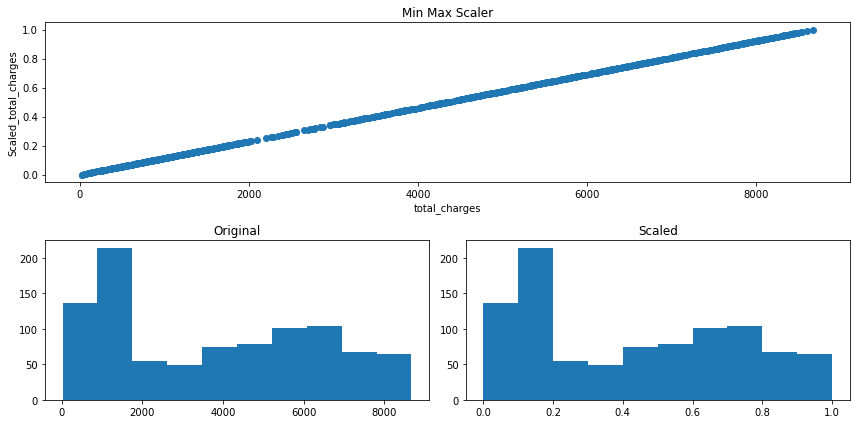

In [13]:
visualize_scaled_date(sklearn.preprocessing.MinMaxScaler(), 'Min Max Scaler', 'total_charges')

In [14]:
# Standard Scaler

scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(train)

train_sscaled = scaler.transform(train)
validate_sscaled = scaler.transform(validate)
test_sscaled = scaler.transform(test)

In [15]:
train.head()


,tenure,monthly_charges,total_charges
1256,61,73.80,4616.05
225,55,69.05,3842.60
662,67,24.90,1680.25
628,58,19.55,1079.65
824,59,24.45,1493.10


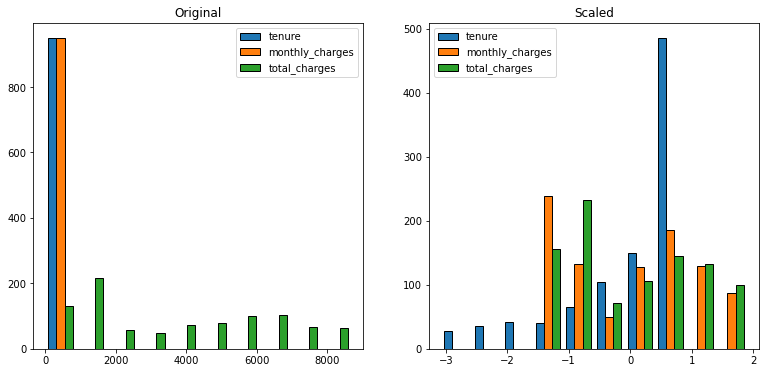

In [16]:
plt.figure(figsize=(13,6))
plt.subplot(121)
plt.hist(train, bins=10, ec='black')
plt.title('Original')
plt.legend(train)
plt.subplot(122)
plt.hist(train_sscaled,bins=10,ec='black')
plt.title('Scaled')
plt.legend(train)

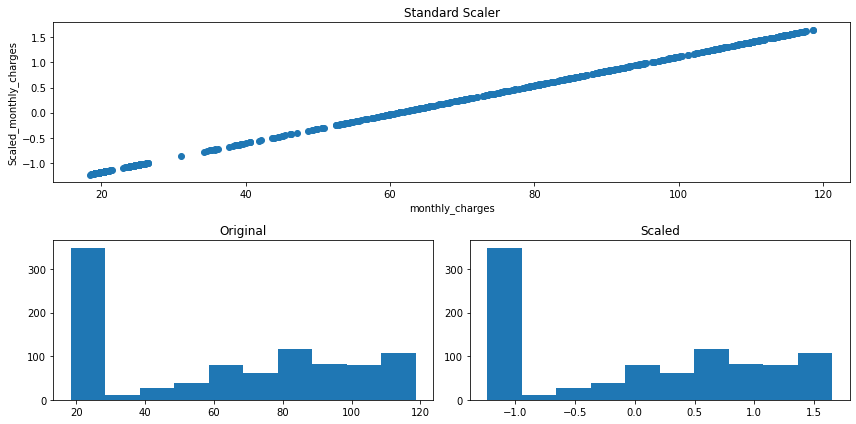

In [17]:
visualize_scaled_date(sklearn.preprocessing.StandardScaler(), 'Standard Scaler', 'monthly_charges')


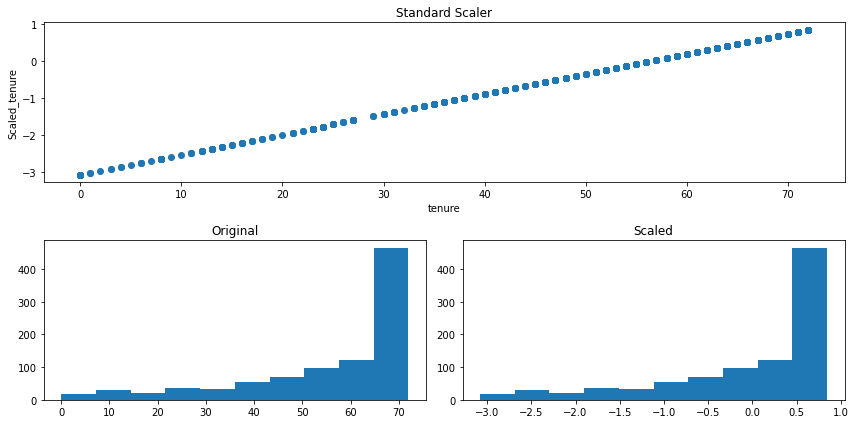

In [18]:
visualize_scaled_date(sklearn.preprocessing.StandardScaler(), 'Standard Scaler', 'tenure')



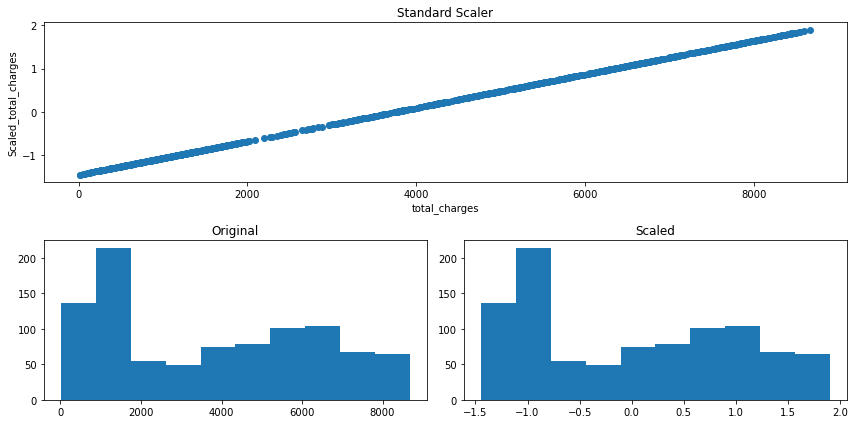

In [19]:
visualize_scaled_date(sklearn.preprocessing.StandardScaler(), 'Standard Scaler', 'total_charges')



In [21]:
# Robust Scaler

scaler = sklearn.preprocessing.RobustScaler()
scaler.fit(train)

train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

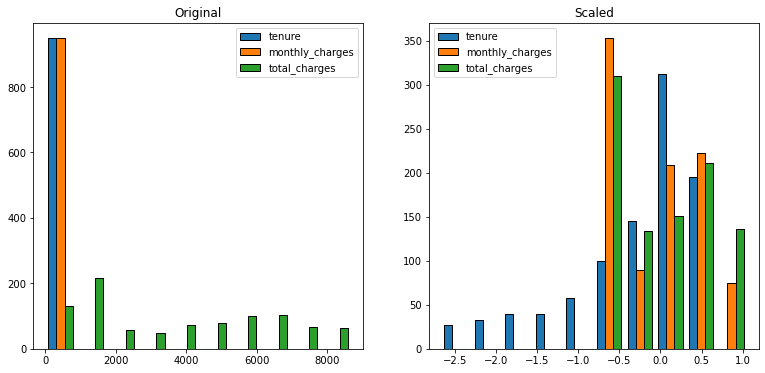

In [23]:
plt.figure(figsize=(13,6))
plt.subplot(121)
plt.hist(train, bins=10, ec='black')
plt.title('Original')
plt.legend(train)
plt.subplot(122)
plt.hist(train_scaled,bins=10,ec='black')
plt.title('Scaled')
plt.legend(train)

2.Apply the '''.inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?


In [25]:
# Min-max scaling

scaler = sklearn.preprocessing.MinMaxScaler()

scaler.fit(train)

train_scaled_inv = scaler.inverse_transform(train)
validate_scaled_inv = scaler.inverse_transform(validate)
test_scaled_inv = scaler.inverse_transform(test)

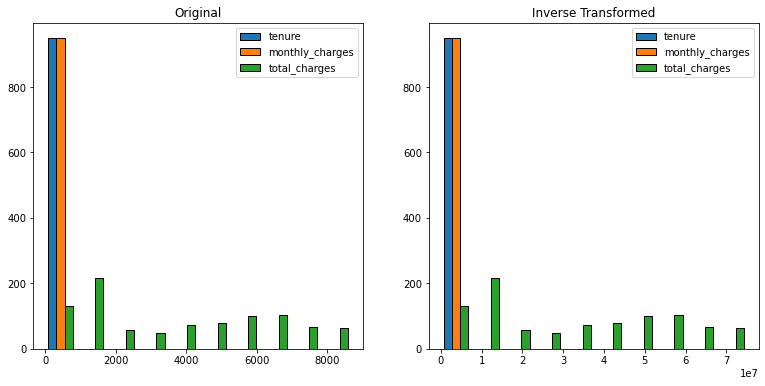

In [27]:
plt.figure(figsize=(13,6))
plt.subplot(121)
plt.hist(train, bins=10, ec='black')
plt.title('Original')
plt.legend(train)
plt.subplot(122)
plt.hist(train_scaled_inv,bins=10,ec='black')
plt.title('Inverse Transformed')
plt.legend(train)

In [29]:
# Standard Scaler

scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(train)

train_scaled_inv = scaler.inverse_transform(train)
validate_scaled_inv = scaler.inverse_transform(validate)
test_scaled_inv = scaler.inverse_transform(test)

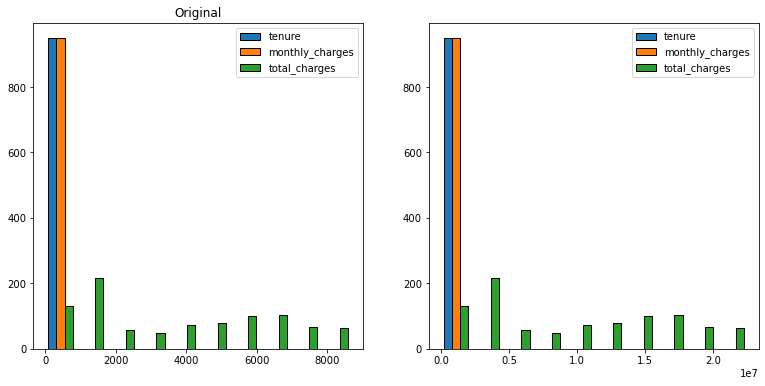

In [30]:
plt.figure(figsize=(13,6))
plt.subplot(121)
plt.hist(train, bins=10, ec='black')
plt.title('Original')
plt.legend(train)
plt.subplot(122)
plt.hist(train_scaled_inv,bins=10,ec='black')
plt.title
('Inverse Transformed')
plt.legend(train)

In [31]:
# Robust Scaler

scaler = sklearn.preprocessing.RobustScaler()
scaler.fit(train)

train_scaled_inv = scaler.inverse_transform(train)
validate_scaled_inv = scaler.inverse_transform(validate)
test_scaled_inv = scaler.inverse_transform(test)

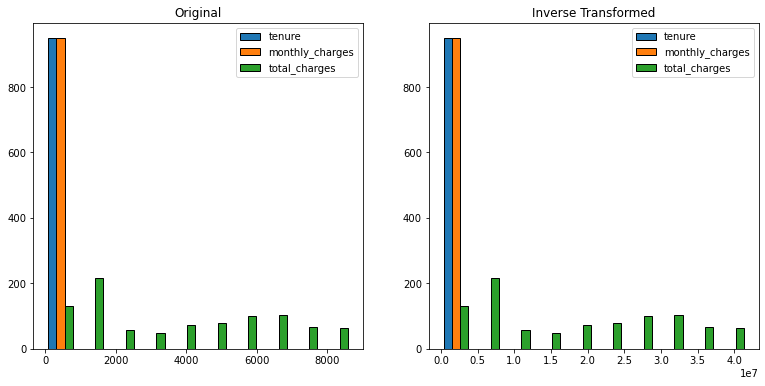

In [32]:
plt.figure(figsize=(13,6))
plt.subplot(121)
plt.hist(train, bins=10, ec='black')
plt.title('Original')
plt.legend(train)
plt.subplot(122)
plt.hist(train_scaled_inv,bins=10,ec='black')
plt.title('Inverse Transformed')
plt.legend(train)

3. Read the documentation for sklearn's ```QuantileTransformer```. Use ```normal``` for the ```output_distribution``` and apply this scaler to your data. Visualize the result of your data scaling.



Documentation: ```sklearn.preprocessing.QuantileTransformer(*, n_quantiles=1000, output_distribution='normal', ignore_implicit_zeros=False, subsample=100000, random_state=None, copy=True)```

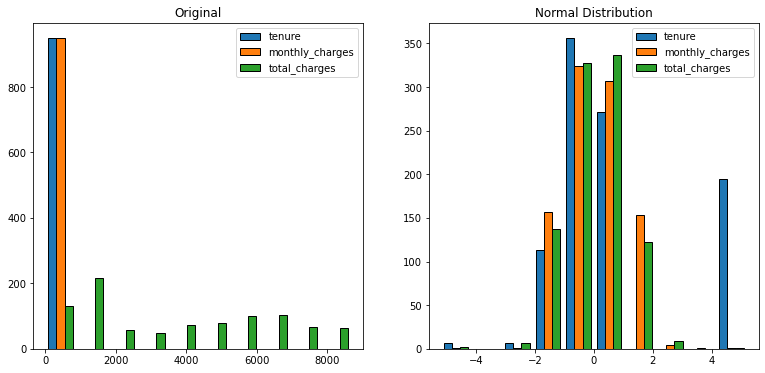

In [33]:
qt = QuantileTransformer(n_quantiles=10, output_distribution = 'normal', random_state=0)
train_qt = qt.fit_transform(train)

plt.figure(figsize=(13,6))
plt.subplot(121)
plt.hist(train, bins=10, ec='black')
plt.title('Original')
plt.legend(train)
plt.subplot(122)
plt.hist(train_qt,bins=10,ec='black')
plt.title('Normal Distribution')
plt.legend(train)


4.  Use the ```QuantileTransformer```, but omit the ```output_distribution``` argument. Visualize your results. What do you notice?


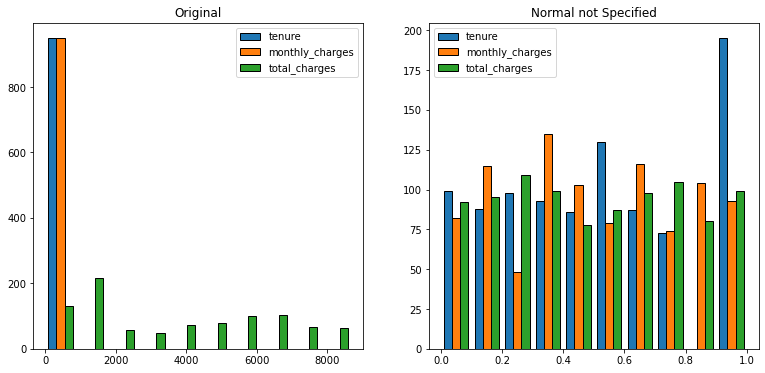

In [36]:
qt = QuantileTransformer(n_quantiles=10, random_state=0)
train_qt = qt.fit_transform(train)

plt.figure(figsize=(13,6))
plt.subplot(121)
plt.hist(train, bins=10, ec='black')
plt.title('Original')
plt.legend(train)
plt.subplot(122)
plt.hist(train_qt,bins=10,ec='black')
plt.title('Normal not Specified')
plt.legend(train)



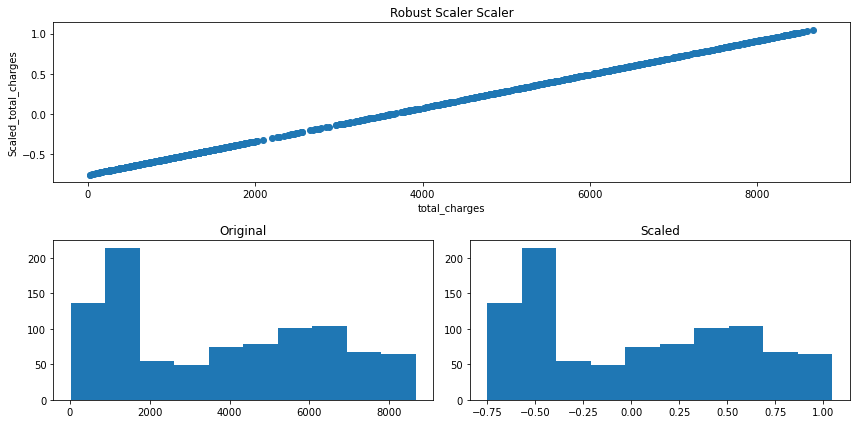

In [37]:
visualize_scaled_date(sklearn.preprocessing.RobustScaler(), 'Robust Scaler Scaler', 'total_charges')

5.  Based on the work you've done, choose a scaling method for your dataset. Write a function within your ```prepare.py``` that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [38]:
import sklearn.preprocessing

def Standard_Scaler(X_train, X_validate, X_test):
    """
    Takes in X_train, X_validate and X_test dfs with numeric values only
    Returns scaler, X_train_scaled, X_validate_scaled, X_test_scaled dfs
    """

    scaler = sklearn.preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
    X_validate_scaled = pd.DataFrame(scaler.transform(X_validate), index = X_validate.index, columns = X_validate.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)
    
    return scaler, X_train_scaled, X_validate_scaled, X_test_scaled


def Min_Max_Scaler(X_train, X_validate, X_test):
    """
    Takes in X_train, X_validate and X_test dfs with numeric values only
    Returns scaler, X_train_scaled, X_validate_scaled, X_test_scaled dfs 
    """
    scaler = sklearn.preprocessing.MinMaxScaler().fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
    X_validate_scaled = pd.DataFrame(scaler.transform(X_validate), index = X_validate.index, columns = X_validate.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)
    
    return scaler, X_train_scaled, X_validate_scaled, X_test_scaled

In [39]:
X_train = train[['monthly_charges', 'tenure']]
X_validate = test[['monthly_charges', 'tenure']]
X_test = test[['monthly_charges', 'tenure']]

# Use the Standard_Scaler Function defined above

scaler, X_train_scaled, X_validate_scaled, X_test_scaled = Standard_Scaler(X_train, X_validate, X_test)

X_train_scaled.head()
    
    

,monthly_charges,tenure
1256,0.361757,0.245562
225,0.225110,-0.081509
662,-1.044987,0.572634
628,-1.198894,0.082026
824,-1.057932,0.136538


In [40]:
# Use the Min-Mix_Scaler, X_train_scaled, X_validate_scaled, X_test_scaled = Standard_Scaler(X_train, X_validate, X_test)

scaler, X_train_scaled, X_validate_scaled, X_test_scaled = Min_Max_Scaler(X_train, X_validate, X_test)

X_train_scaled.head()
    

,monthly_charges,tenure
1256,0.552618,0.847222
225,0.505237,0.763889
662,0.064838,0.930556
628,0.011471,0.805556
824,0.060349,0.819444


## Effect of outliers on scaling 

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

In [41]:
# connection function for accessing mysql 
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

query = """
select * 
from properties_2017
join predictions_2017 using(parcelid)
where transactiondate between "2017-05-01" and "2017-06-30";
"""

df = pd.read_sql(query, get_connection('zillow'))
df.head()

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id,logerror,transactiondate
0,11393337,2463969,NaN,NaN,NaN,3.0,3.0,NaN,4.0,3.0,...,43439.0,2016.0,22755.0,756.94,Y,14.0,6.037235e+13,117,0.086137,2017-06-08
1,11289917,2061546,1.0,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,136104.0,2016.0,27214.0,2319.90,Y,15.0,6.037901e+13,1248,-0.362001,2017-06-23
2,11705026,1834372,NaN,NaN,NaN,1.0,2.0,NaN,6.0,1.0,...,35606.0,2016.0,23624.0,543.69,None,NaN,6.037232e+13,1772,-0.146056,2017-06-30
3,14269464,1923117,NaN,NaN,NaN,3.0,4.0,NaN,NaN,3.0,...,880456.0,2016.0,445569.0,9819.72,None,NaN,6.059064e+13,2028,0.021085,2017-06-01
4,11389003,2121349,NaN,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,614000.0,2016.0,449000.0,7673.19,None,NaN,6.037703e+13,3273,-0.325393,2017-06-01


In [42]:
# Prep the data
df = df.rename(columns={"bedroomcnt": "bedrooms", "bathroomcnt": "bathrooms", "calculatedfinishedsquarefeet": "square_feet", "taxamount": "taxes", "taxvaluedollarcnt": "tax_value"})

In [43]:
features = [
    "parcelid",
    "bedrooms",
    "bathrooms",
    "square_feet",
    "tax_value"
]

df = df[features]
df = df.set_index("parcelid")
df.head()



,bedrooms,bathrooms,square_feet,tax_value
parcelid,,,,
11393337,3.0,3.0,1534.0,43439.0
11289917,3.0,2.0,1458.0,136104.0
11705026,2.0,1.0,1421.0,35606.0
14269464,4.0,3.0,2541.0,880456.0
11389003,3.0,2.0,1650.0,614000.0


In [44]:
# Drop the nulls
df = df.dropna()
df.head()

,bedrooms,bathrooms,square_feet,tax_value
parcelid,,,,
11393337,3.0,3.0,1534.0,43439.0
11289917,3.0,2.0,1458.0,136104.0
11705026,2.0,1.0,1421.0,35606.0
14269464,4.0,3.0,2541.0,880456.0
11389003,3.0,2.0,1650.0,614000.0


In [48]:
# split the data in train, validate and test
train, test = train_test_split(df, test_size = 0.2, random_state = 123)
train, validate = train_test_split(train, test_size = 0.25, random_state = 123)

In [49]:
#Train dataframe, but with outliers removed
train_no_outliers = train[train.tax_value <= 2_000_000]

### Min-Max Scaler

In [50]:
#scale values of 'tax_values' with outliers
scaler = sklearn.preprocessing.MinMaxScaler()
scaled = scaler.fit_transform(train[['tax_value']])
scaled

array([[0.01059357],
       [0.04662492],
       [0.01925157],
       ...,
       [0.00150311],
       [0.04182688],
       [0.03711992]])

In [51]:
#scale values of 'tax_values' with outliers removed


scaler1 = sklearn.preprocessing.MinMaxScaler()
scaled1 = scaler.fit_transform(train_no_outliers[['tax_value']])
scaled1

array([[0.12723974],
       [0.56001372],
       [0.23123139],
       ...,
       [0.01805393],
       [0.50238429],
       [0.4458488 ]])

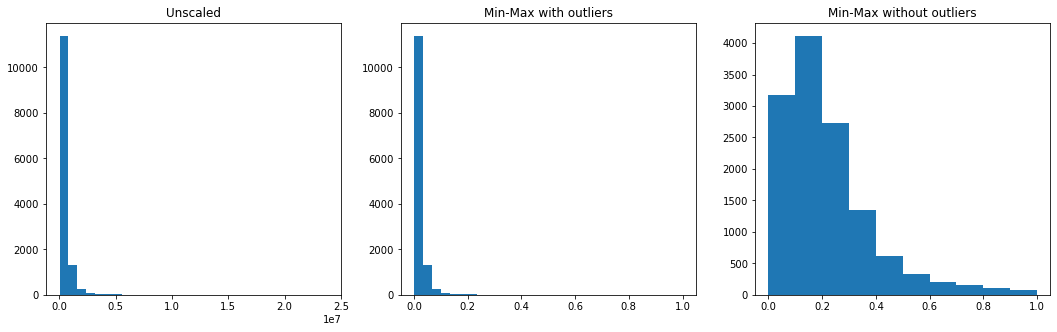

In [52]:
fig = plt.figure(figsize = (18,5))

plt.subplot(131)
plt.hist(train.tax_value, bins = 30)
plt.title('Unscaled')
# plt.xlim(-1,20)


plt.subplot(132)
plt.hist(scaled, bins = 30)
plt.title('Min-Max with outliers')
# plt.xlim(-1,20)

plt.subplot(133)
plt.hist(scaled1)
plt.title('Min-Max without outliers');

Text(0, 0.5, 'Scaled tax value')

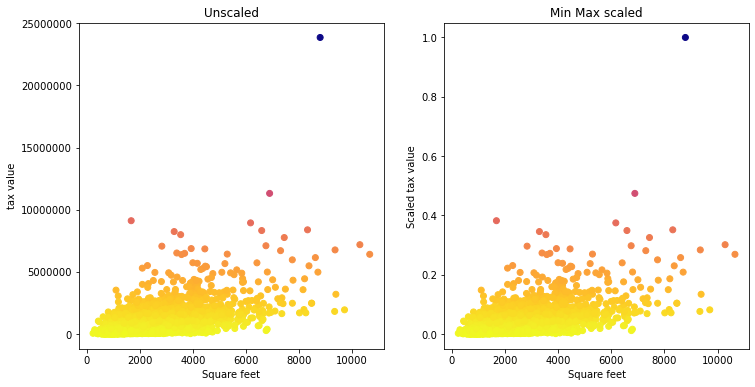

In [53]:
fig = plt.figure(figsize = (12,6))
plt.subplot(121)
plt.scatter(train.square_feet, train.tax_value, c = train.tax_value,cmap = 'plasma_r')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Unscaled')
plt.xlabel('Square feet')
plt.ylabel('tax value')


plt.subplot(122)
plt.scatter(train.square_feet, scaled, c = train.tax_value,cmap = 'plasma_r')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Min Max scaled')
plt.xlabel('Square feet')
plt.ylabel('Scaled tax value')

### Robust Scaler

In [54]:
scaler = sklearn.preprocessing.RobustScaler()
scaled = scaler.fit_transform(train[['tax_value']])

scaler1 = sklearn.preprocessing.RobustScaler()
scaled1 = scaler.fit_transform(train_no_outliers[['tax_value']])



''

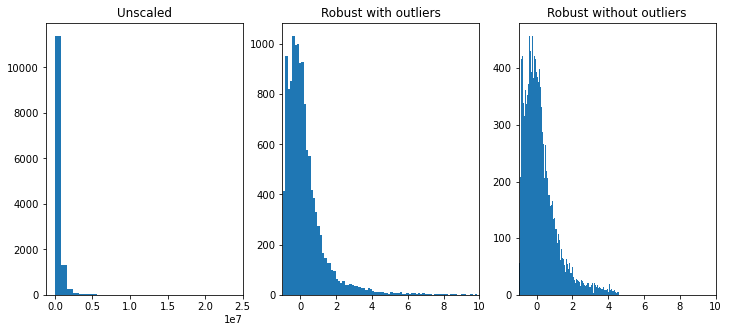

In [55]:
fig = plt.figure(figsize = (12,5))


plt.subplot(131)
plt.hist(train.tax_value, bins = 30)
plt.title('Unscaled')
# plt.xlim(-1,20)



plt.subplot(132)
plt.hist(scaled, bins = 500)
plt.title('Robust with outliers')
plt.xlim(-1,10)

plt.subplot(133)
plt.hist(scaled1, bins = 100)
plt.title('Robust without outliers')
plt.xlim(-1,10)
;

Text(0, 0.5, 'Scaled tax value')

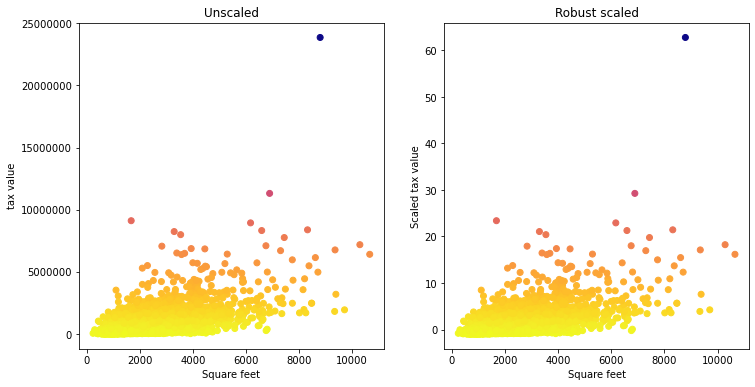

In [56]:
fig = plt.figure(figsize = (12,6))
plt.subplot(121)
plt.scatter(train.square_feet, train.tax_value, c = train.tax_value,cmap = 'plasma_r')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Unscaled')
plt.xlabel('Square feet')
plt.ylabel('tax value')


plt.subplot(122)
plt.scatter(train.square_feet, scaled, c = train.tax_value,cmap = 'plasma_r')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Robust scaled')
plt.xlabel('Square feet')
plt.ylabel('Scaled tax value')

### Quantile Transformer

''

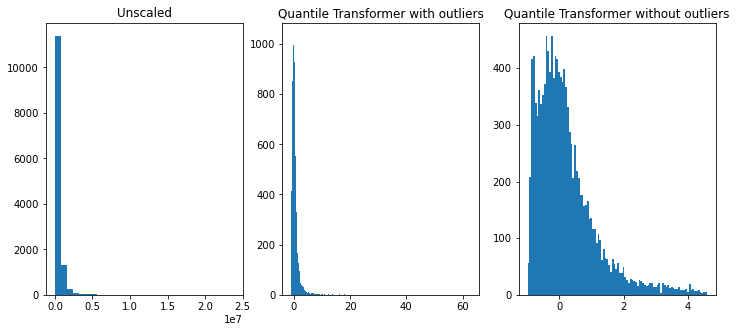

In [57]:
fig = plt.figure(figsize = (12,5))


plt.subplot(131)
plt.hist(train.tax_value, bins = 30)
plt.title('Unscaled')
# plt.xlim(-1,20)


plt.subplot(132)
plt.hist(scaled, bins = 500)
plt.title('Quantile Transformer with outliers')

plt.subplot(133)
plt.hist(scaled1, bins = 100)
plt.title('Quantile Transformer without outliers')
;

Text(0, 0.5, 'Scaled tax value')

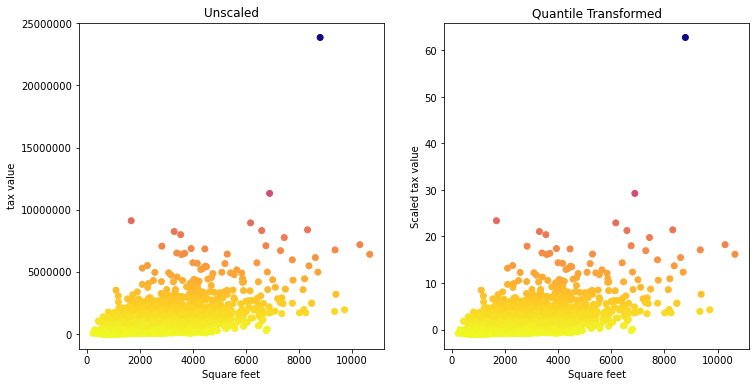

In [58]:
fig = plt.figure(figsize = (12,6))
plt.subplot(121)
plt.scatter(train.square_feet, train.tax_value, c = train.tax_value,cmap = 'plasma_r')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Unscaled')
plt.xlabel('Square feet')
plt.ylabel('tax value')


plt.subplot(122)
plt.scatter(train.square_feet, scaled, c = train.tax_value,cmap = 'plasma_r')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Quantile Transformed')
plt.xlabel('Square feet')
plt.ylabel('Scaled tax value')

### Takeaways:

1. Handle outliers first (unless you know that you want to use a non-linear (e.g. Quantile Transformer)) 
scaling


2. MinMaxScaler will transform each value in the column proportionally within the desireable range (usually [0,1]). Use this as the your first choice to scale. It will preserve the shape of the distribution (no distortion).


3. StandardScaler() will transform each value in the column to range about the mean 0 and standard deviation 1,  Use StandardScaler if you know the data distribution is normal.


4. If there are outliers (which you don't want to discard), use RobustScaler(). 
    Alternatively you could remove the outliers and use either of the above 2 scalers


5. Good practice to visualize the distribution of variables after scaling (make sure the transformation you were hoping for actually happened)


6. Use non-linear scalers when you really have to (e.g.Quantiler Transformer when you must have data normally distributed).